In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("smartcart_customers.csv")

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,46,27,15,5,5,3,6,5,0,0


In [4]:
df.shape

(2240, 22)

In [5]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Response                0
dtype: int64

## Data Preprocessing

### 1. Handle missing values

In [6]:
 df["Income"]=df["Income"].fillna(df["Income"].median())

In [7]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,46,27,15,5,5,3,6,5,0,0


### 2.Feature Engineering

In [8]:
# Age 
df["Age"] = 2026 - df["Year_Birth"]

In [9]:
# customer joining date

df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst = True)

Refference_date = df["Dt_Customer"].max()

df["Customer_tenure_Days"] = (Refference_date - df["Dt_Customer"]).dt.days

In [10]:
# total spending

df["Total_spending"] = df["MntWines"]  + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"] 

In [11]:
# total children 
df["Total_children"] = df["Kidhome"] + df["Teenhome"]

In [12]:
# Education
df["Education"].value_counts()

# Undergraduate, graduate, Postgraduate
df["Education"] = df["Education"].replace({
    "2n Cycle" : "Undergraduate", "Basic" : "Undergraduate",
    "Graduation" : "Graduate",
    "PhD" : "Postgraduate", "Master" : "Postgraduate"
    
})


In [13]:
# Marita status
df["Living_with"] = df["Marital_Status"].replace({
    "Married" : "Partner", "Together" : "Partner",
    "Single" : "Alone", "Divorced" : "Alone",
    "Widow" : "Alone", "Absurd" : "Alone", "YOLO" : "Alone"
    
})

In [14]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_tenure_Days,Total_spending,Total_children,Living_with
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,1,69,663,1617,0,Alone
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,72,113,27,2,Alone
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,61,312,776,0,Partner
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,42,139,53,1,Partner
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,45,161,422,1,Partner


In [15]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'Customer_tenure_Days', 'Total_spending',
       'Total_children', 'Living_with'],
      dtype='object')

### Drop columns

In [16]:
cols = ["ID", "Year_Birth", "Marital_Status", "Kidhome", "Teenhome", "Dt_Customer", "Customer_tenure_Days"]
spendings = ["MntWines","MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

cols_to_drop = cols + spendings
df_cleaned = df.drop(columns = cols_to_drop )

In [17]:
df_cleaned.shape

(2240, 14)

### Outliers

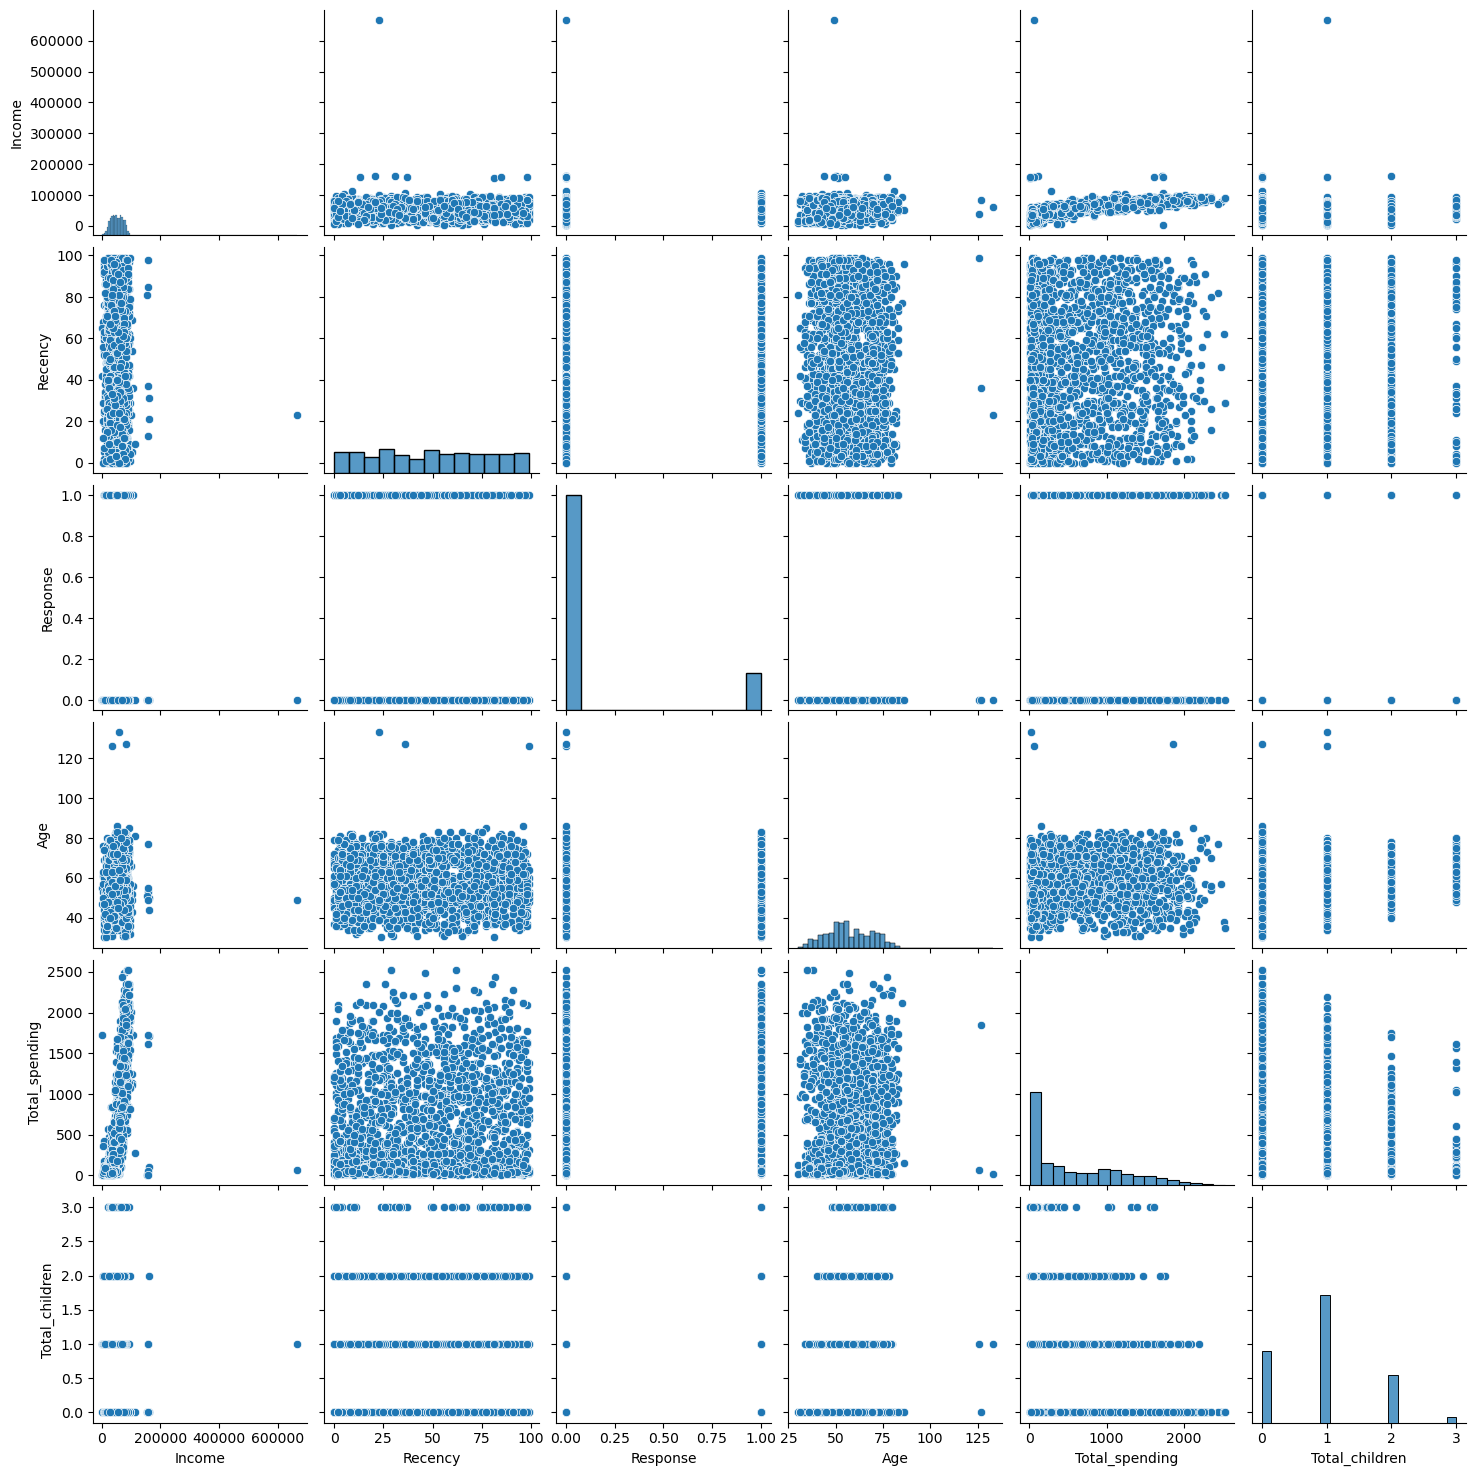

In [18]:
cols = ["Income", "Recency", "Response", "Age", "Total_spending", "Total_children"]

# Relative plots of some Features - Pair plot
sns.pairplot(df_cleaned[cols])


In [19]:
# reomove outliers 
print("Data size with outliers :", len(df_cleaned))

df_cleaned = df_cleaned[(df_cleaned["Age"] < 90)]
df_cleaned = df_cleaned[(df_cleaned["Income"] < 600_000)]


print("Data size with outliers :", len(df_cleaned))

Data size with outliers : 2240
Data size with outliers : 2236


### Heatmap

In [20]:
corr = df_cleaned.corr(numeric_only = True)

<Axes: >

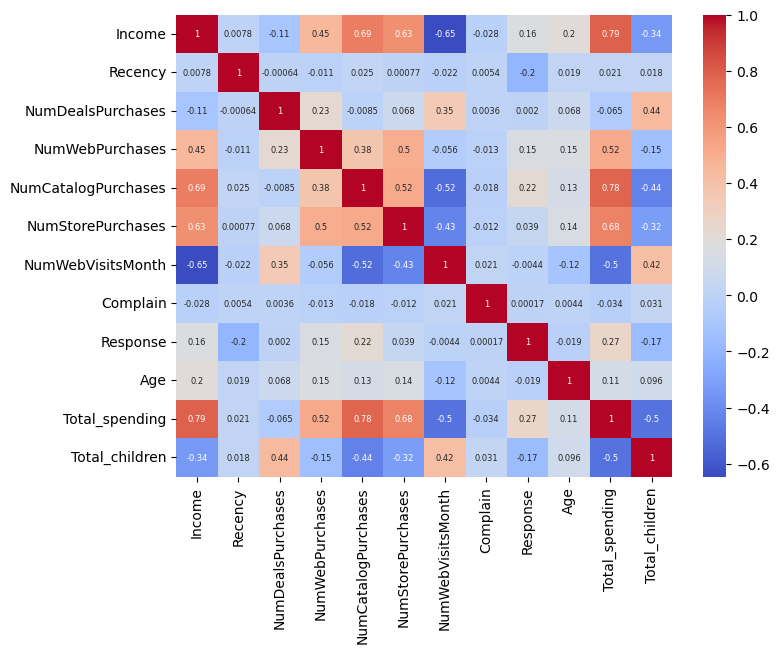

In [21]:
# Heatmap 

plt.figure(figsize = (8, 6))

sns.heatmap(
    corr,
    annot = True,
    annot_kws = {"size" : 6},
    cmap = "coolwarm"
    
)

### Encoding

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
ohe = OneHotEncoder()

cat_cols = ["Education", "Living_with"]

enc_cols = ohe.fit_transform(df_cleaned[cat_cols])

In [24]:
enc_df = pd.DataFrame(enc_cols.toarray(), columns = ohe.get_feature_names_out(cat_cols) , index = df_cleaned.index)

In [25]:
df_encoded = pd.concat([df_cleaned.drop(columns = cat_cols), enc_df], axis = 1)

In [26]:
df_encoded.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Total_spending,Total_children,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_with_Alone,Living_with_Partner
0,58138.0,58,3,8,10,4,7,0,1,69,1617,0,1.0,0.0,0.0,1.0,0.0
1,46344.0,38,2,1,1,2,5,0,0,72,27,2,1.0,0.0,0.0,1.0,0.0
2,71613.0,26,1,8,2,10,4,0,0,61,776,0,1.0,0.0,0.0,0.0,1.0
3,26646.0,26,2,2,0,4,6,0,0,42,53,1,1.0,0.0,0.0,0.0,1.0
4,58293.0,94,5,5,3,6,5,0,0,45,422,1,0.0,1.0,0.0,0.0,1.0


### Scaling

In [27]:
X = df_encoded

In [28]:
from sklearn.preprocessing import StandardScaler 

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### visualization

In [30]:
from sklearn.decomposition import PCA

In [31]:
# 2D

pca = PCA(n_components = 3)

X_pca = pca.fit_transform(X_scaled)



In [32]:
pca.explained_variance_ratio_

array([0.24502203, 0.12049884, 0.10959914])

Text(0.5, 0.92, '3d Projection')

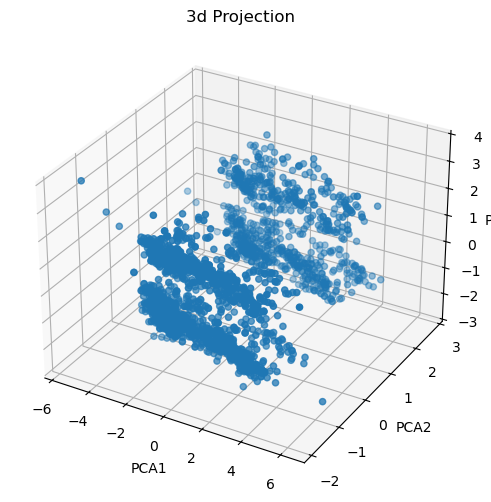

In [33]:
# 3d
fig = plt.figure(figsize = (8, 6))

ax = fig.add_subplot(111, projection = "3d")

ax.scatter(xs = X_pca[:,0], ys = X_pca[:,1], zs = X_pca[:,2])
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
ax.set_title("3d Projection")


## Analyze k value
### 1. Elbow Method

In [34]:
from sklearn.cluster import KMeans
from kneed import KneeLocator


In [35]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(
    n_clusters = k,
    random_state = 42)
    kmeans.fit_predict(X_pca)
    wcss.append(kmeans.inertia_)
        
    

In [36]:
knee = KneeLocator(range(1, 11), wcss, curve = "convex", direction = "decreasing")

In [37]:
print(f"Optimal k value : {knee.elbow}")

Optimal k value : 4


Text(0, 0.5, 'wcss')

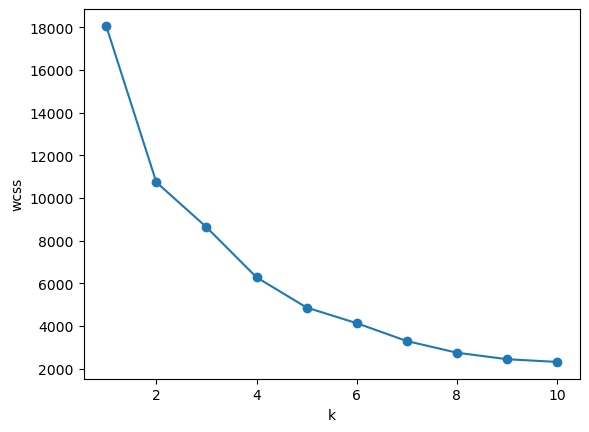

In [38]:
# plot

plt.plot(range(1, 11), wcss, marker = 'o')
plt.xlabel("k")
plt.ylabel("wcss")

### 2. Silhouette score

In [39]:
from sklearn.metrics import silhouette_score
scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)

    scores.append(score)

Text(0, 0.5, 'silhouette score')

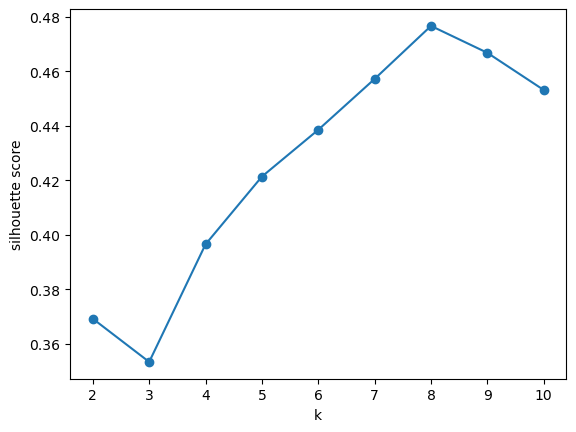

In [40]:
# plot 

plt.plot(range(2, 11), scores, marker = 'o')
plt.xlabel("k")
plt.ylabel("silhouette score")


Text(0, 0.5, 'Silhouette score')

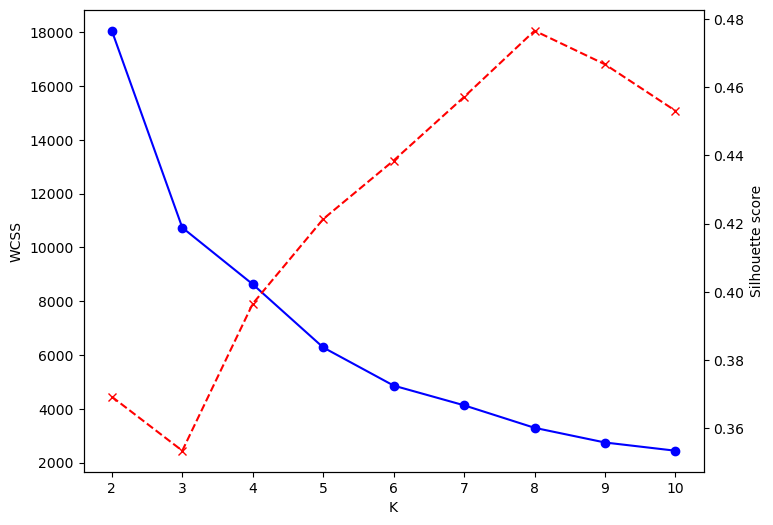

In [41]:
# combined plot
k_range  = range(2, 11)

fig, ax1 = plt.subplots(figsize = (8, 6))

ax1.plot(k_range, wcss[:len(k_range)], marker = 'o', color = "blue")
ax1.set_xlabel("K")
ax1.set_ylabel("WCSS")

ax2 = ax1.twinx()
ax2.plot(k_range, scores[:len(k_range)], marker = 'x', color = "red", linestyle = "--" )
ax2.set_xlabel("K")
ax2.set_ylabel("Silhouette score")




## Clustering

In [42]:
# kmeans 

kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans_labels = kmeans.fit_predict(X_pca)

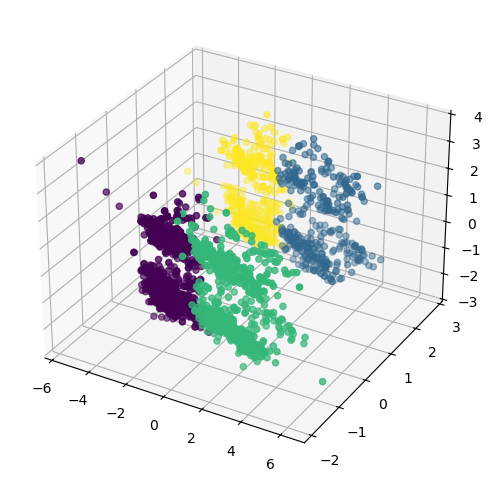

In [43]:
# plot
fig = plt.figure(figsize = (8, 6))

ax = fig.add_subplot(111, projection = "3d")

ax.scatter(xs = X_pca[:,0], ys = X_pca[:,1], zs = X_pca[:,2], c = kmeans_labels)

In [45]:
# Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
agg_clf = AgglomerativeClustering(n_clusters = 4, linkage = 'ward')
labels_agg = agg_clf.fit_predict(X_pca)

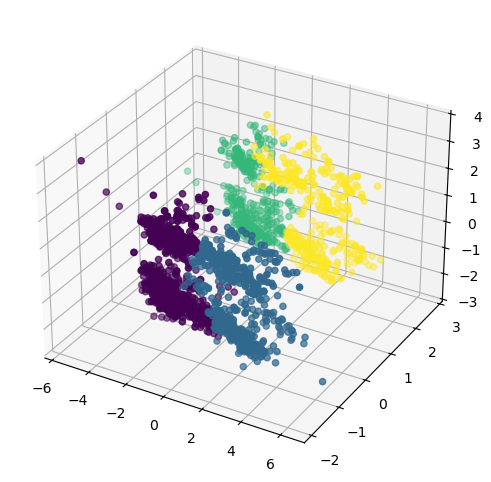

In [46]:
# plot
fig = plt.figure(figsize = (8, 6))

ax = fig.add_subplot(111, projection = "3d")

ax.scatter(xs = X_pca[:,0], ys = X_pca[:,1], zs = X_pca[:,2], c = labels_agg)

### Characterisation of clusters

In [57]:


X["cluster"] = labels_agg

In [58]:
X.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Total_spending,Total_children,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_with_Alone,Living_with_Partner,cluster
0,58138.0,58,3,8,10,4,7,0,1,69,1617,0,1.0,0.0,0.0,1.0,0.0,3
1,46344.0,38,2,1,1,2,5,0,0,72,27,2,1.0,0.0,0.0,1.0,0.0,2
2,71613.0,26,1,8,2,10,4,0,0,61,776,0,1.0,0.0,0.0,0.0,1.0,1
3,26646.0,26,2,2,0,4,6,0,0,42,53,1,1.0,0.0,0.0,0.0,1.0,0
4,58293.0,94,5,5,3,6,5,0,0,45,422,1,0.0,1.0,0.0,0.0,1.0,0


<Axes: xlabel='cluster', ylabel='count'>

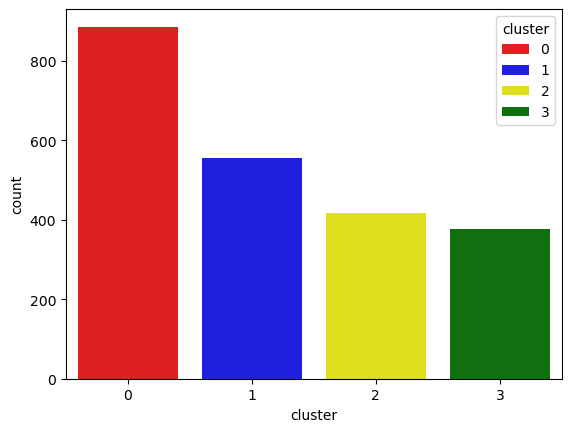

In [59]:
pal = ["red", "blue", "yellow", "green"]

sns.countplot(x = X["cluster"], palette = pal, hue =X["cluster"] )

<Axes: xlabel='Total_spending', ylabel='Income'>

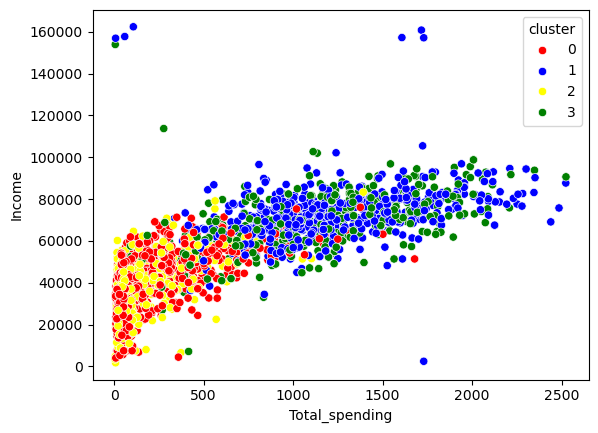

In [60]:
# income vs total spending

sns.scatterplot(x = X["Total_spending"], y = X["Income"], hue = X["cluster"], palette = pal )

In [62]:
# cluster summary

cluster_summary = X.groupby("cluster").mean()
print(cluster_summary)

               Income    Recency  NumDealsPurchases  NumWebPurchases  \
cluster                                                                
0        39146.037810  49.603837           2.659142         3.088036   
1        72165.020683  48.140288           1.895683         5.676259   
2        36949.892344  48.468900           2.480861         2.645933   
3        68919.811170  50.130319           2.005319         5.696809   

         NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
cluster                                                                        
0                   0.919865           4.076749           6.431151  0.011287   
1                   5.392086           8.566547           3.562950  0.005396   
2                   0.818182           3.578947           6.576555  0.011962   
3                   4.787234           8.212766           3.896277  0.005319   

         Response        Age  Total_spending  Total_children  \
cluster               